# Intro

1959 - Arthur Samuel, "Field of study where we give machines the ability to learn without explicitly programming them to do so."

1963 - SVM Vladmir Vatnik?? (showed that SVM better at identifying handwritten digits than deep learning)

Recently - Deep learning became more popular thanks to Google

# Regression Part 1

In [312]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

#plt.style.use('ggplot')
%matplotlib inline

In [149]:
df1 = quandl.get('WIKI/GOOGL')

df1.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [284]:
df = df1[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [285]:
df.shape

(3424, 5)

In [286]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']*100.0

/Users/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [297]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [298]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [299]:
forecast_col = 'Adj. Close'

In [300]:
df.fillna(-99999,inplace=True)

In [313]:
forecast_out = int(math.ceil(0.03*len(df)))
forecast_out

97

In [314]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-05-30,996.17,0.145557,0.369773,1511472.0,NaN
2017-05-31,987.09,1.267362,-0.915470,1703990.0,NaN
2017-06-01,988.29,0.490747,-0.269436,1295552.0,NaN
2017-06-02,996.12,0.036140,0.761691,1719720.0,NaN
2017-06-05,1003.88,0.350640,0.600267,1353264.0,NaN


In [315]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)    #IMPORTANT - In order to work with new data, it needs to be scaled AGAINST the old data

In [316]:
##### This section is used in Part 2, added here for sake of non-redundancy

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

##### Back to Part 1

In [317]:
df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X),len(y))

3124 3124


In [318]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [319]:
clf = LinearRegression(n_jobs=-1)

In [320]:
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9309902150818086


In [321]:
#### Pickling the model - separate part

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

    
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

#### Back to part 2

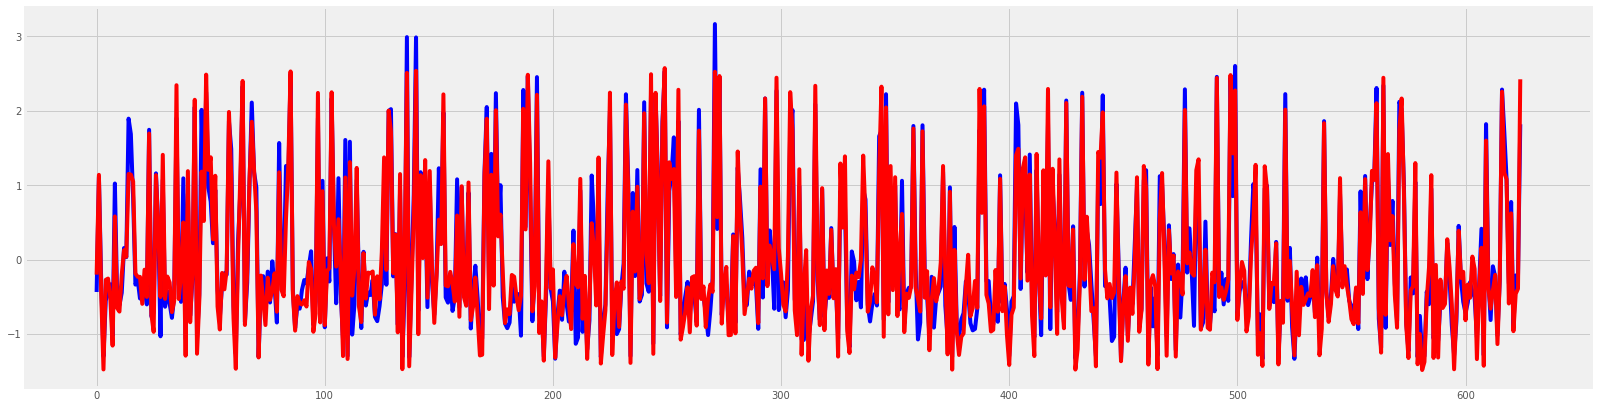

In [322]:
plt.figure(figsize=(25,7))
plt.plot(preprocessing.scale(y_test),'blue')
plt.plot(preprocessing.scale(clf.predict(X_test)),'red')

# Regression Part 2

In [323]:
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

[ 867.98128666  869.64472625  865.36637443  868.63613942  883.93803304
  890.1530177   899.12250555  897.07469627  885.97490548  864.06220508
  860.05288009  855.57758038  858.2646413   860.58243911  861.80891557
  869.34344086  870.50487321  870.70579558  875.31873319  879.64544952
  880.72255932  878.13643144  882.88604289  887.03110109  890.2266959
  892.2635146   891.94544086  888.64877221  890.52986522  885.93749357
  897.30417251  891.35315362  890.18661937  888.29389672  892.11679782
  894.88284921  898.80779284  902.73280233  905.81980552  907.28628401
  909.75076559  911.62118736  913.63192126  909.27573999  892.21865836
  890.85849606  879.35622919  875.92670981  878.35825566  881.32337094
  890.389269    890.78994899  888.59108674  897.12496548  893.29595465
  890.21253316  886.29794402  883.21313973  882.73435188  881.0003321
  882.18688627  881.1567329   895.62301288  895.25160667  897.87740852
  901.41740048  900.35509072  919.83290737  930.07927038  931.23040178
  933.04

In [324]:
df['Forecast'] = np.nan

In [325]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

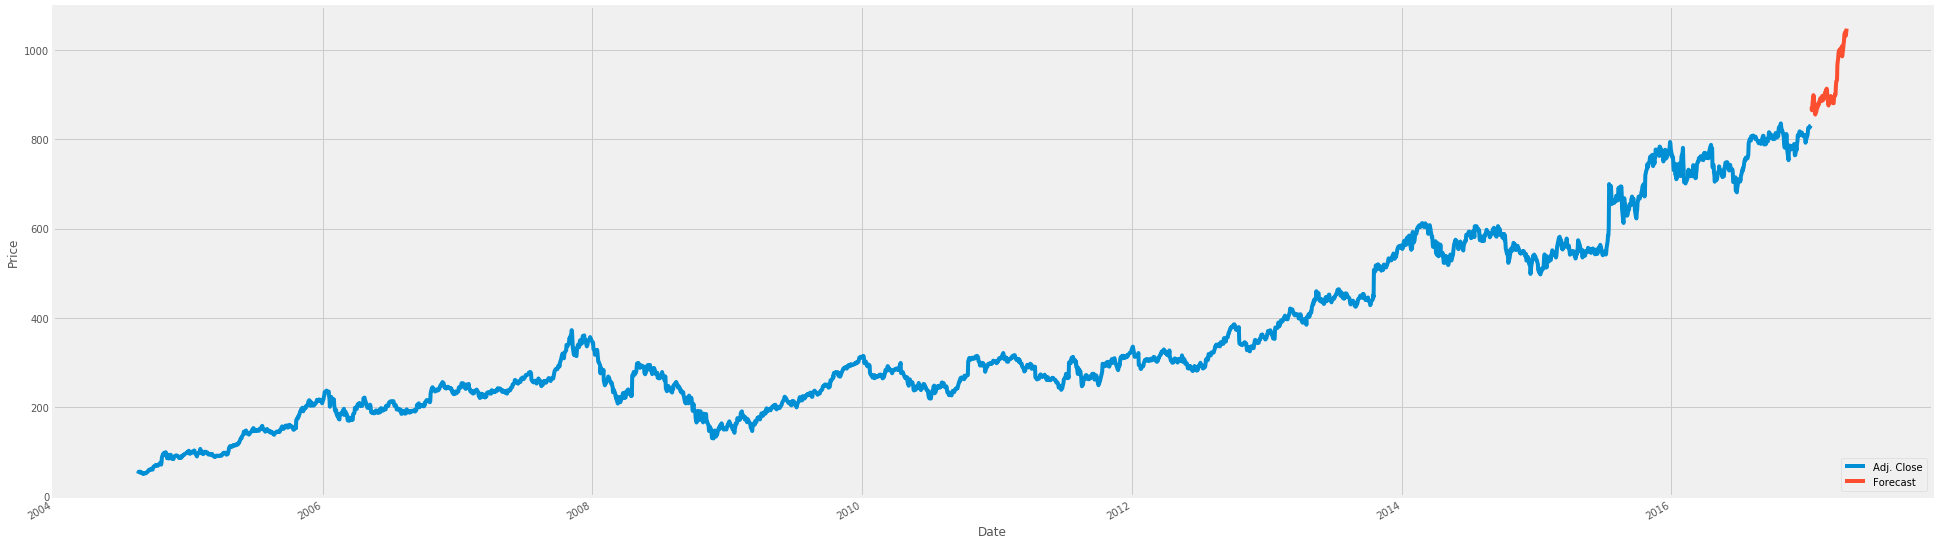

In [326]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

plt.figure(figsize=(30,10))
df['Adj. Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Best Fit Slope

$$ y = mx + b $$

$$M = \frac{\bar x . \bar y - \bar xy}{(\bar x)^2 - \bar x^2}$$

$$ b = \bar y - m \bar x $$

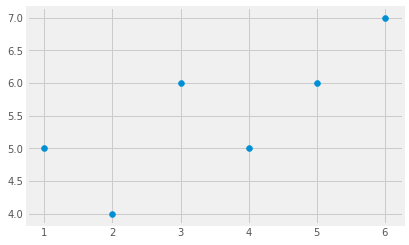

In [327]:
from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5,6],dtype=np.float64)
ys = np.array([5,4,6,5,6,7],dtype=np.float64)

plt.scatter(xs,ys)
plt.show()

In [328]:
def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs) * mean(ys)) - mean(xs*ys))/((mean(xs)*mean(xs)) - mean(xs*xs))  #PEMDAS
    b = mean(ys) - m*mean(xs)
    return m,b

m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


In [329]:
predict_x = 8
predict_y = (m*predict_x)+b

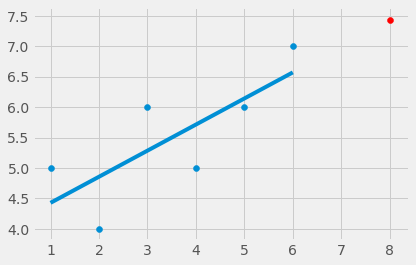

In [330]:
regression_line = [(m*x)+b for x in xs]

plt.style.use('fivethirtyeight')

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y,color='red')
plt.plot(xs,regression_line)
plt.show()

# R-Squared

$$ R^2 = 1 - \frac{SE _\hat y}{SE _\bar y} $$

In [331]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig)**2)

def coeff_of_determination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [333]:
r_squared = coeff_of_determination(ys,regression_line)
print(r_squared)

0.5844155844155845


In [334]:
import random

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []

    for i in range(hm):
        y = val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64),np.array(ys, dtype=np.float64)

-2.280956848030019 7.7036585365853725


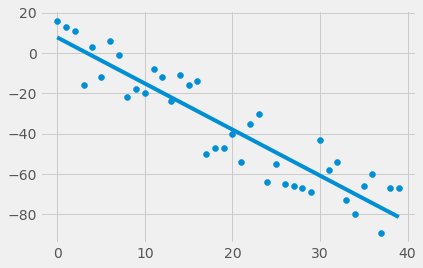

0.8484244788293384


In [335]:
xs,ys = create_dataset(40, 20, 2, correlation='neg')
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

regression_line = [(m*x)+b for x in xs]

plt.style.use('fivethirtyeight')

plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

r_squared = coeff_of_determination(ys,regression_line)
print(r_squared)

# K Nearest Neighbours

Dataset from : https://archive.ics.uci.edu/ml/datasets.html

Advantage is that it can work on linear and non-linear data. But it doesn't scale too well with extremely large data

In [441]:
from sklearn import neighbors

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)

In [442]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9642857142857143


In [379]:
example_measures = np.array([4,2,1,1,1,2,3,2,1]).reshape(1,-1)

prediction = clf.predict(example_measures)
print(prediction)

[2]


$$ Euclidean\,Distance = \sqrt{\sum\limits_{i=1}^{n} {(q_i - p_i)}^2} $$

In [385]:
from math import sqrt
from collections import Counter
import warnings

plot1 = [1,3]
plot2 = [2,5]

In [386]:
def euclidean_dist(plot1, plot2):
    return sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)

euclidean_dist(plot1,plot2)

2.23606797749979

In [387]:
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

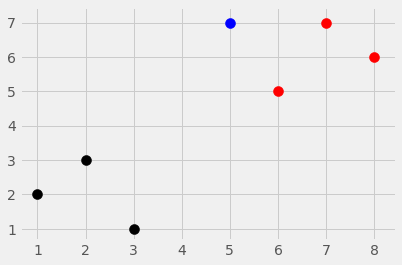

In [399]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100,color='b')
plt.show()

In [435]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data) >= k:
        warning.warn('K is set to a value less than total voting groups.')
        
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_dist,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_results = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    #print(vote_results,confidence)
    return vote_results,confidence

In [428]:
result,confidence = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

r 1.0
r


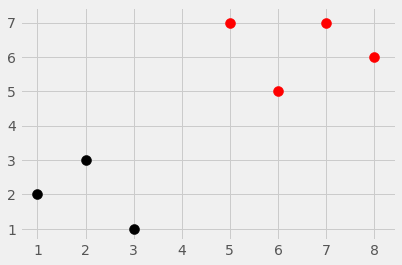

In [429]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100,color=result)
plt.show()

In [430]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)

full_data = df.astype(float).values.tolist()
print(full_data[:5])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]


In [431]:
random.shuffle(full_data)
print(full_data[:5])

[[8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [8.0, 8.0, 9.0, 4.0, 5.0, 10.0, 7.0, 8.0, 1.0, 4.0], [10.0, 10.0, 10.0, 1.0, 6.0, 1.0, 2.0, 8.0, 1.0, 4.0], [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [439]:
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [440]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set,data,k=5)
        if group == vote:
            correct+=1
        else:
            print(confidence)
        total += 1
        
print('Accuracy:',correct/total)

0.8
0.6
1.0
1.0
1.0
0.6
0.6
Accuracy: 0.9496402877697842


# Support Vector Machine

It separates groups, one at a time. So its a fundamentally a binary classifier but can be used for multi-class classification.



In [460]:
from sklearn import neighbors,svm

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)

In [461]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf = svm.SVC()
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9357142857142857


In [462]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])

prediction = clf.predict(example_measures)
print(prediction)

[2 2]


What is a dot product?

$$ \vec A = [1,3] $$
$$ \vec B = [4,2] $$

$$ \vec A . \vec B = (1*4)+(3*2) = 10 $$

**What is a support vector?**

These are the vectors that represent the boundary points of their classes. So, if we were to find a decision boundary to seperate 2 classes of points, the support vectors are the set of vectors from both the classes which are closest to the decision boundary. 

- Lets say, we have a decision boundary between 2 sets of points that below to the PLUS class  and MINUS class
- $\vec X_{-sv}$ for plus class support vector, $\vec X_{+sv}$ for minus class support vector.

- When a new vector $\vec v$ is asked to be classified by SVM, SVM first finds a $\vec W$ which is the vector that is perpendicular to the decision boundary. (Vector from 0,0 to a point on the decision line such that its perpendicular to the decision line)
- Once this is done, the SVM finds the projection of the $\vec v$ onto the $\vec W$ and based on that it decides on what side of the decision boundary does the $\vec v$ lie.
- This is the same as taking a dot product.
$$\vec v . \vec W + b \geq 0 $$
- if $\vec v . \vec W + b = 0 $ then it lines on the decision boundary


So in order to solve this, we need to know $\vec W$ and $b$ and find our support vectors. We know that we have constraints of , 

$$\vec X_{-sv} . \vec W + b = -1$$
$$\vec X_{+sv} . \vec W + b = +1$$

So we introduce $y_i$ which is simply the Class of the features. Thus it is +1 if the vector belongs to PLUS class and -1 if it belongs to MINUS class. And we multiply it to the above equations.

$$y_i(\vec X_{+sv} . \vec W + b) = y_i(+1) = +1*+1 = 1$$
$$y_i(\vec X_{-sv} . \vec W + b) = y_i(-1) = -1*-1 = 1$$

Then we set both of these equal to 0 by moving the 1 to LHS.

$$y_i(\vec X_{+sv} . \vec W + b) -1 = 0$$
$$y_i(\vec X_{-sv} . \vec W + b) -1 = 0$$

So for both +ve and -ve support vector, we get the same equation (which also means that they are equi-distant from the decision function)






Width between the 2 support vectors needs to be maximized. 

$$ Maximize( Width)$$

$$\implies Maximize((\vec X_+ - \vec X_-).\frac{\vec W}{||\vec W||})$$

Using above equations and solving the 2 equations after replacing $X_+$ and $X_-$ we get

$$\implies Maximize(\frac{2}{||\vec W||})$$

$$\implies Minimize(||\vec W||)$$

And for mathematical convenience,

$$\implies Minimize({1 \over 2}||\vec W||^2)$$

This needs to be minimized, with constraint $y_i(\vec X_i.\vec W + b)-1$

In comes Lagrange - 

$$L(W,b) = {1 \over 2}||\vec W||^2 - \sum \alpha_i [y_i(\vec X_i.\vec W + b)-1]$$

Differentiating - 

$$\frac{\partial L}{\partial W} = \vec W - \sum \alpha_i y_i X_i$$

$$\frac{\partial L}{\partial b} = - \sum \alpha_i y_i = 0$$

$$ L = \sum\limits_{i} {\alpha_i} - {1 \over 2}\sum\limits_{ij} {\alpha_i \alpha_j y_i y_j.(\vec X_i.\vec X_j})$$

This is a quadratic equation. Which is a problem.

<u>**Back to basics**</u>

**What is the equation of a Hyperplane?** - $X.W+b$

**What is the hyperplace for a +ve class support vector?** - $X_i.W+b = +1$

**What is the hyperplace for a -ve class support vector?** - $X_i.W+b = -1$

**What if we have $X_i.W+b = 0.98$?** - It means its close to the hyperplace of the +ve support vector but on the wrong side of it (between decision boundary and hyperplace of +ve support vector). But its gonna be a + class

**What is the hyperplace for the decision boundary?**  - $X.W+b = 0$

**What is the formula for doing a classification?** - Its the $sign(X_i.W + b)$

**How do we optimize for W & b?** - The objective is to minimize $||\vec W||$ and maximize $b$.

**What is the constraint?** - $y_i(X_i.W + b) \geq 1$

**Another way to look at it from code perspective?** - $Class(Knownfeatures.W + b) \geq 1$, there are many values of W and b that may satisfy this, but we want the ones that find the best separation of boundaries $\implies$ min(W) and max(b)

So, SVMs are just an optimization problem (a quadratic programming optimization problem)

# SVM from scratch

In [466]:
from pprint import pprint

In [468]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8]]),
             1:np.array([[5,1],
                         [6,-1],
                         [7,3]])}

pprint(data_dict)

{-1: array([[1, 7],
       [2, 8],
       [3, 8]]),
 1: array([[ 5,  1],
       [ 6, -1],
       [ 7,  3]])}


In [480]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):    
        #No other function runs when you call the class except init (unless called specifically)
        
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    # Train
    def fit(self,data):
        self.data = data
        
        # {||W|| : [w,b]}
        opt_dict = {}
        
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        
        all_data = []
        
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     #point of expense
                     self.max_feature_value * 0.001]
        
        #Extremely expensive
        b_range_multiple = 5
        
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            #We can do this cuz convex
            
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        #Weakest link in SVM fundamentally
                        #SMO tries to fix it a bit
                        #y_i(x_i.w +b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                if w[0] < 0:
                    optimized=True
                    print('Optimized a step')
                else:
                    w = w - step
                    
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            
            latest_optimum = opt_choice[0][0]+step*2
                
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200, marker="*", c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        #hyperplace = wx+b
        #pos v = 1
        #neg v = -1
        #dec v = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        
        #Negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')
        
        #Decision Boundary hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')
        
        plt.show()
            

Optimized a step
Optimized a step
Optimized a step


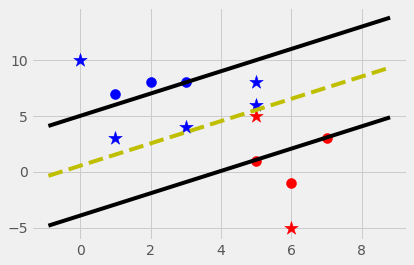

In [483]:
svm = Support_Vector_Machine()

svm.fit(data = data_dict)
predict_us = [[0,10],
               [1,3],
               [3,4],
               [5,5],
               [5,6],
               [6,-5],
               [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

# Kernels

How do we handle non-linearly separable data, so if we could take the non-linearly separable data and push it into a higher dimension, we maybe able to find ourselves in a situation where we can actually create a hyperplane in this space to linearly separate the data. How many dimensions need to be added? No idea, theoritically infinite.

SVM would have a massive issue with higher dimensions since its quadratic optimization problem. This is where the issue is, since it would make it infeasible to run SVM on higher dim data. Unless, we can do computations in higher dimensions, without paying the cost.

Kernel is just a similarity matrix fundamentally, which takes 2 inputs and outputs their similarity using the inner product. This happens in a Z space which is different than a X space (input space).

**What are all the operations that we did in SVM?**

1. Classification algo, $y = sign(\vec W.\vec X + b)$

2. Constraint one, $y_i(\vec X_i.\vec W + b) - 1 \geq 0$

3. Constraint two, $W = \sum \alpha_i y_i.X_i$

4. Langrange, $L = \sum\limits_{i} {\alpha_i} - {1 \over 2}\sum\limits_{ij} {\alpha_i \alpha_j y_i y_j.(\vec X_i.\vec X_j})$

All of these have dot product. Meaning that we could theoritically replace the $\vec X_i$ from X vector space with a $\vec Z_i$ from a higher dimensional Z space. So it would have any issue if we replace the data with a kernel of the data.

$$ K(X,X') = Z.Z'$$

$$ Z = f(X) $$

$$ Z' = f(X') $$

A lot of texts, whenever a kernel is being applied, it uses $\phi$ to denote it as - 

$$ y = W \phi X + b $$

Lets say we have a feature space X

$$ X = \begin{pmatrix} x_1 & x_2 \end{pmatrix}$$

So, if we want to convert this into a 2nd degree polynomial we can use a kernel as , 

$$ Z = \begin{pmatrix} 1 & x_1 & x_2 & x_1^2 & x_2^2 & x_1 x_2 \end{pmatrix}$$

So our kernel in Z space is - 

$$ K(X,X') = Z.Z' = 1 + X_1 X'_1 + X_2 X'_2 + X_1^2 X_1^{\prime 2} + X_2^2 X_2^{\prime 2} + X_1 X'_1 X_2 X'_2 $$



Can we do this operation without visiting the kernel Z space?? Yes.

For polynomial kernel in 2 dimensions - 

$$ K(X,X') = (1+X.X')^P$$

So for number of dimensions, n -

$$ K(X,X') = (1 + X_1.X'_1 + ... + X_n X'_n)^P$$

Another kernel is -

$$ K(X,X') = e^{(- \gamma ||X-X'||^2)} $$

# Soft Margin SVM

The margin by default in sklearn.svm is Soft since if we had a hard margin, it will have more chances of overfitment.

How do we know we are overfitting? If our validation accuracy is low on test data and we are using a model with a huge percentage of support vectors ( number of support vectors / total number of samples) then we are overfitting. Since the decision boundary is wrapping around almost all the different data points if the ratio is close to 1.

So how do we create a soft margin? We use a term called Slack $\xi$ in our constraint

$$y_i(X_i.W + b) \geq 1-\xi$$

So our total slack is $\sum\limits_{i}\xi_i$

Now, we would want to minimize the amount of slack as well, so in our old equation - 

$$ Minimize({1 \over 2}||\vec W||^2 + C \sum\limits_{i}\xi_i)$$

This is where C comes in. If we raise C, we allow more violations. In other words it lets you decide how important Slack is in the optimization model. Default = 1 so it gives same importance to slack as default.

# Types of Kernels

Custom SVM using CVXOPT optimizers and self defined kernels

In [493]:
import cvxopt
import cvxopt.solvers
import pylab as pl

     pcost       dcost       gap    pres   dres
 0: -5.6307e+01 -1.5021e+02  5e+02  2e+01  2e+00
 1: -7.9896e+01 -1.7177e+02  2e+02  6e+00  5e-01
 2: -1.1550e+02 -2.0844e+02  1e+02  4e+00  4e-01
 3: -1.6038e+02 -2.2622e+02  9e+01  2e+00  2e-01
 4: -1.8973e+02 -2.1255e+02  3e+01  4e-01  3e-02
 5: -2.0012e+02 -2.0577e+02  6e+00  3e-02  3e-03
 6: -2.0436e+02 -2.0443e+02  8e-02  4e-04  4e-05
 7: -2.0441e+02 -2.0442e+02  8e-04  4e-06  4e-07
 8: -2.0442e+02 -2.0442e+02  8e-06  4e-08  4e-09
Optimal solution found.
Support vectors in total points 8 180
20 out of 20 predictions correct


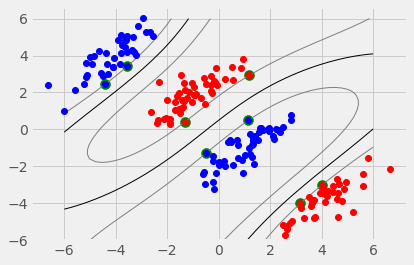

In [514]:
def linear_kernel(x1,x2):
    return np.dot(x1,x2)

def polynomial_kernel(x,y,p=3):
    return (1+np.dot(x,y))**p

def gaussian_kernel(x,y,sigma=5.0):
    return np.exp(-np.linalg.norm(x-y)**2/(2*(sigma**2)))

class SVM(object):
    
    def __init__(self, kernel=linear_kernel,C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        #Gram Matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i],X[j])
        
        P = cvxopt.matrix(np.outer(y,y)*K)
        q = cvxopt.matrix(np.ones(n_samples)*-1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)
        
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples)*-1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples)*-1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1,tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1,tmp2)))
        
        #Solve QP problem
        solution = cvxopt.solvers.qp(P,q,G,h,A,b)
        
        #Lagrange Multipliers
        a = np.ravel(solution['x'])
        
        #Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print('Support vectors in total points',len(self.a),n_samples)
        
        #Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)
        
        #Weight Vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
    
    def project(self,X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i],sv)
                y_predict[i] = s
            return y_predict + self.b
        
    def predict(self, X):
        return np.sign(self.project(X))
    
if __name__ == '__main__':
    import pylab as pl
    
    def gen_lin_separable_data():
        #generate training data in 2-d case
        mean1 = np.array([0,2])
        mean2 = np.array([2,0])
        cov = np.array([[0.8,0.6],[0.6,0.8]])
        X1 = np.random.multivariate_normal(mean1,cov,100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2,cov,100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2
    
    def gen_non_lin_separable_data():
        mean1 = [-1,2]
        mean2 = [1,-1]
        mean3 = [4,-4]
        mean4 = [-4,4]
        cov = [[1.0,0.8],[0.8,1.0]]
        X1 = np.random.multivariate_normal(mean1,cov,50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2,cov,50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2
    
    def gen_lin_separable_overlap_data():
        #generate training data in 2-d case
        mean1 = np.array([0,2])
        mean2 = np.array([2,0])
        cov = np.array([[1.5,1.0],[1.0,1.5]])
        X1 = np.random.multivariate_normal(mean1,cov,100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2,cov,100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2
    
    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train
    
    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test
    
    def plot_margin(X1_train, X2_train, clf):
        def f(x,w,b,c=0):
        #given x, return y such that [x,y] are on the line w.x + b = c
            return (-w[0] * x - b + c) / w[1]
    
        pl.plot(X1_train[:,0],X1_train[:,1],'ro')
        pl.plot(X2_train[:,0],X2_train[:,1],'bo')
        pl.scatter(clf.sv[:,0],clf.sv[:,1],s=100,c='g')
    
        #wx+b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0],[a1,b1],'k')
        
        #wx+b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0],[a1,b1],'k--')
        
        #wx+b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0],[a1,b1],'k--')
        
        pl.axis("tight")
        pl.show()
        
    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0],X1_train[:,1],'ro')
        pl.plot(X2_train[:,0],X2_train[:,1],'bo')
        pl.scatter(clf.sv[:,0],clf.sv[:,1],s=100,c='g')
        
        X1,X2 = np.meshgrid(np.linspace(-6,6,50),np.linspace(-6,6,50))
        X = np.array([[x1,x2] for x1, x2 in zip(np.ravel(X1),np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0],colors='k',linewidths=1, origin='lower')
        pl.contour(X1, X2, Z+1, [0.0],colors='grey',linewidths=1, origin='lower')
        pl.contour(X1, X2, Z-1, [0.0],colors='grey',linewidths=1, origin='lower')
        
        pl.axis("tight")
        pl.show()
        
    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1,X2,y2)
        X_test, y_test = split_test(X1, y1, X2, y2)
        
        clf = SVM()
        clf.fit(X_train, y_train)
        
        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict==y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))
        
        plot_margin(X_train[y_train==1],X_train[y_train==-1],clf)
        
    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1,X2,y2)
        X_test, y_test = split_test(X1, y1, X2, y2)
        
        clf = SVM(gaussian_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict==y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))
        
        plot_contour(X_train[y_train==1],X_train[y_train==-1],clf)
        
    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1,X2,y2)
        X_test, y_test = split_test(X1, y1, X2, y2)
        
        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict==y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))
        
        plot_contour(X_train[y_train==1],X_train[y_train==-1],clf)
        
test_non_linear()

# SVM Summary

SVM has 2 methods of multi-class classification - OVO and OVR

1. OVR is one versus rest separates each class against all other and creates independent decision boundaries. Problem with it is that even though you data may be class balanced, in OVR, since each class is against rest, it becomes an unbalanced classification problem. This is default.

2. OVO is one versus one. Here it makes a decision boundary between each class. Then given a point to be predicted, it checks which side the point lies on all the created decision boundaries and takes a vote. This is more complex than first since there you know immediately which class the point is, here it needs a vote against all the decision boundaries.

**Parameters**

C - lets you control Slack, making it soft or hard margin and the extent of it.

kernel - which kernel

degree - for polynomial kernel, ignored otherwise

gamma - kernel coefficient for rbf, poly, sigmod. Default is set to auto = 1/n_features

coef0 - independent term in kernel function for poly and sigmod. Default = 0

probability - This is similar to the confidence in knn (as compared to accuracy). uses CV to estimate probabilities, extremely heavy on large data

shrinking - This is for SMO sequential memory optimization, default = true

tol - $y_i(x_i.w + b) -1 \geq 0$ was our equation for support vectors. But here we can use a tolerance for selecting support vectors. By default it is 1e-3. So if both sides have a value of that or less, it has found its support vectors.

cache_size - kernel cache in MB

class_weight - If you have classes which need to be weighted

max_iter - Each time you have not found the support vectors, you can use tolerance (tol) decide when to reach it. But you can also tell it how many iterations to decide the support vectors.

decision_function_shape - decide OVR or OVO

random_state - seed for probability estimation

**Attributes**

n_support_ - gives number of support vectors

support_vectors_ - gives the support vectors

support_ - gives indices of support vectors

coef_ - W (only for linear kernel)

intercept_ - b

dual_coef_ - Coefficients of support vectors in decision function, for multiclass and 1vs1 classifiers (read more in documentation)